In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import gensim
import sklearn
"""
from gensim import corpora, models, similarities
from gensim.utils import smart_open, simple_preprocess
from gensim.matutils import corpus2csc
from gensim.parsing.preprocessing import STOPWORDS
"""
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
print "Numpy version: ", np.__version__
print "Pandas version: ", pd.__version__
print "Matplotlib version: ", plt.matplotlib.__version__
print "Seaborn version: ", sns.__version__
print "Sklearn version: ", sklearn.__version__
print "NLTK version: ", nltk.__version__
print "Gensim version: ", gensim.__version__
print "PyLDAvis version: ", pyLDAvis.__version__

Numpy version:  1.11.2
Pandas version:  0.19.0
Matplotlib version:  1.5.3
Seaborn version:  0.7.1
Sklearn version:  0.18
NLTK version:  3.2.1
Gensim version:  0.12.4
PyLDAvis version:  2.0.0


## NLTK checks

More details at: http://www.nltk.org/

In [4]:
nltk.download("movie_reviews")
nltk.download("punkt")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /homed/smishra8/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from nltk.corpus import movie_reviews

In [6]:
movie_reviews.categories()

[u'neg', u'pos']

In [7]:
movie_reviews.words()

[u'plot', u':', u'two', u'teen', u'couples', u'go', ...]

In [8]:
sents = movie_reviews.sents()

In [9]:
len(sents)

71532

In [10]:
sents[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [11]:
for i, s in enumerate(sents[:10]):
    print "S[%s]:\t%s" % (i, " ".join(s))

S[0]:	plot : two teen couples go to a church party , drink and then drive .
S[1]:	they get into an accident .
S[2]:	one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
S[3]:	what ' s the deal ?
S[4]:	watch the movie and " sorta " find out .
S[5]:	.
S[6]:	.
S[7]:	critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .
S[8]:	which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly .
S[9]:	they seem to have taken this pretty neat concept , but executed it terribly .


## Gensim checks
More details at: https://radimrehurek.com/gensim/

In [12]:
bigrams = gensim.models.Phrases(sents[:100])

In [13]:
bigrams.vocab.items()[0:10]

[('of_making', 1),
 ('and_most', 1),
 ('mir_)', 1),
 ('keeping_score', 1),
 ('"_into', 1),
 ('before_it', 1),
 ('the_tale', 1),
 ('they_are', 4),
 ('i_checked', 1),
 ('poorly', 2)]

In [14]:
sorted(bigrams.vocab.iteritems(), key=lambda x: x[1], reverse=True)[:10]

[(',', 116),
 ('the', 112),
 ('.', 86),
 ("'", 67),
 ('and', 50),
 ('a', 47),
 ('of', 46),
 ('it', 45),
 ("'_s", 40),
 ('s', 40)]

In [15]:
word_frequencies = map(lambda x: x[1], bigrams.vocab.iteritems())

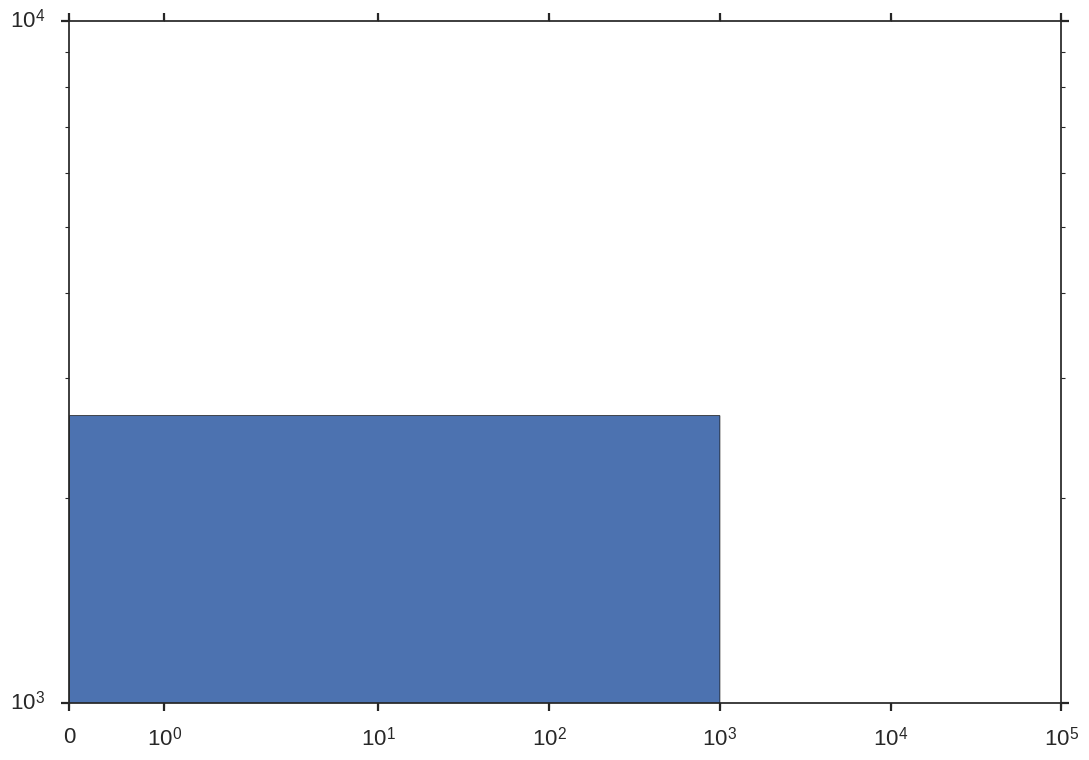

In [16]:
plt.hist(word_frequencies, bins=range(0,70000, 1000), log=True)
plt.xscale("symlog")

In [17]:
sorted(filter(lambda x: isinstance(x[0], str) and "_" in x[0], 
        bigrams.vocab.iteritems()), key=lambda x: x[1], reverse=True)[:30]

[("'_s", 40),
 ("'_t", 16),
 (',_and', 13),
 (',_but', 11),
 ("it_'", 10),
 ('the_film', 9),
 ('there_are', 9),
 ('that_the', 8),
 ('of_the', 8),
 ('/_10', 8),
 ('10_)', 8),
 (',_it', 8),
 (')_-', 7),
 ("don_'", 7),
 (',_there', 6),
 (')_,', 6),
 ('with_the', 6),
 (',_the', 6),
 ('film_is', 6),
 ('and_the', 5),
 ('for_the', 5),
 ('they_are', 4),
 ('the_movie', 4),
 ('the_characters', 4),
 ('in_a', 4),
 ('this_film', 4),
 ('on_the', 4),
 (',_as', 4),
 ('most_of', 4),
 ('of_a', 4)]

In [18]:
corpus = bigrams[sents[:100]]
id2word = gensim.corpora.Dictionary(corpus)

In [19]:
len(id2word.keys())

804

In [20]:
corpus_processed = [id2word.doc2bow(k) for k in corpus]
print len(corpus_processed)

100


In [21]:
corpus_processed[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [22]:
corpus[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [23]:
LDA_model = gensim.models.ldamodel.LdaModel(corpus_processed, num_topics=10, id2word=id2word)

In [24]:
LDA_model.print_topics()

[(0,
  u"0.050*the + 0.022*a + 0.018*. + 0.018*and + 0.016*? + 0.014*to + 0.013*are + 0.012*, + 0.012*'_s + 0.012*-"),
 (1,
  u'0.051*the + 0.033*, + 0.032*. + 0.016*and + 0.016*to + 0.014*that + 0.014*is + 0.012*out + 0.010*one + 0.010*go'),
 (2,
  u'0.025*the + 0.022*that + 0.015*! + 0.013*. + 0.013*\'_s + 0.012*of + 0.010*it + 0.010*, + 0.009*" + 0.008*--'),
 (3,
  u'0.074*, + 0.042*. + 0.038*the + 0.021*" + 0.021*it + 0.021*\'_s + 0.020*and + 0.016*of + 0.011*that + 0.010*is'),
 (4,
  u'0.051*the + 0.035*, + 0.028*. + 0.021*and + 0.020*a + 0.017*is + 0.017*of + 0.014*( + 0.013*) + 0.012*that'),
 (5,
  u'0.033*, + 0.031*the + 0.028*a + 0.022*. + 0.020*- + 0.016*very + 0.016*for + 0.016*and + 0.013*from + 0.012*on'),
 (6,
  u'0.043*. + 0.041*it + 0.041*, + 0.031*the + 0.026*to + 0.024*is + 0.018*that + 0.015*\'_s + 0.014*" + 0.014*and'),
 (7,
  u'0.037*the + 0.032*, + 0.031*of + 0.025*a + 0.021*- + 0.020*. + 0.020*( + 0.020*) + 0.019*and + 0.018*to'),
 (8,
  u'0.016*and + 0.015*it + 

In [25]:
LDA_model.get_document_topics(corpus_processed[0])

[(6, 0.94705224850785663)]

In [26]:
doc_topics = LDA_model[corpus_processed]

In [27]:
doc_topics[1]

[(0, 0.014288499035099701),
 (1, 0.014287201611756449),
 (2, 0.01428599307390304),
 (3, 0.014289263771093953),
 (4, 0.8714126594319247),
 (5, 0.014286266918972949),
 (6, 0.014290413224985725),
 (7, 0.014287651771252402),
 (8, 0.014286059856014549),
 (9, 0.014285991304996271)]

In [28]:
pyLDAvis.gensim.prepare(LDA_model, corpus_processed,
                        id2word)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      21.563616        1       1 -0.070746  0.008497
3      19.816954        1       2 -0.045112  0.079307
4      18.899423        1       3 -0.058830 -0.056347
6      12.479424        1       4 -0.055244  0.059223
1       7.648013        1       5 -0.012700 -0.070751
5       5.637198        1       6  0.058573  0.028214
0       4.855499        1       7  0.002775 -0.063485
9       3.651075        1       8  0.067675  0.015124
8       3.108495        1       9  0.088788  0.011441
2       2.340301        1      10  0.024823 -0.011223, topic_info=     Category       Freq       Term      Total  loglift  logprob
term                                                            
594   Default  86.000000        the  86.000000  30.0000  30.0000
547   Default  34.000000         it  34.000000  29.0000  29.0000
189   Default  36.000000          a  36.000000  28.0000  28.0000
221   Default  90.000000          ,  90.000000  27.0000  27.0000
325   Default  27.000000       that  27.000000  26.0000  26.0000
458   Default   9.000000      movie   9.000000  25.0000  25.0000
510   Default  65.000000          .  65.000000  24.0000  24.0000
367   Default  22.000000          -  22.000000  23.0000  23.0000
107   Default   8.000000       from   8.000000  22.0000  22.0000
626   Default  30.000000        '_s  30.000000  21.0000  21.0000
678   Default   7.000000          ?   7.000000  20.0000  20.0000
311   Default  23.000000          "  23.000000  19.0000  19.0000
693   Default  13.000000         on  13.000000  18.0000  18.0000
351   Default  39.000000        and  39.000000  17.0000  17.0000
15    Default  28.000000         to  28.000000  16.0000  16.0000
666   Default  10.000000        for  10.000000  15.0000  15.0000
410   Default  19.000000          (  19.000000  14.0000  14.0000
208   Default   4.000000       over   4.000000  13.0000  13.0000
239   Default   6.000000        not   6.000000  12.0000  12.0000
454   Default   9.000000        are   9.000000  11.0000  11.0000
559   Default  18.000000          )  18.000000  10.0000  10.0000
512   Default   3.000000       much   3.000000   9.0000   9.0000
763   Default   8.000000         as   8.000000   8.0000   8.0000
21    Default   2.000000       very   2.000000   7.0000   7.0000
136   Default  13.000000       this  13.000000   6.0000   6.0000
680   Default   6.000000         be   6.000000   5.0000   5.0000
263   Default   5.000000        out   5.000000   4.0000   4.0000
452   Default   3.000000        see   3.000000   3.0000   3.0000
697   Default  37.000000         of  37.000000   2.0000   2.0000
640   Default   4.000000         --   4.000000   1.0000   1.0000
...       ...        ...        ...        ...      ...      ...
575   Topic10   0.129613       hand   1.382165   1.3880  -6.0083
632   Topic10   0.127983        bit   1.392711   1.3678  -6.0210
492   Topic10   0.127627      point   1.392595   1.3651  -6.0238
640   Topic10   0.413040         --   4.649250   1.3340  -4.8493
3     Topic10   0.166406          d   1.919990   1.3092  -5.7584
503   Topic10   0.118938  considers   1.383952   1.3008  -6.0943
354   Topic10   0.119199        sad   1.396776   1.2938  -6.0921
758   Topic10   0.117723    figured   1.395633   1.2821  -6.1045
38    Topic10   0.117595        dig   1.398446   1.2790  -6.1056
502   Topic10   0.112691     basing   1.387955   1.2440  -6.1482
325   Topic10   1.161482       that  27.097785   0.6051  -3.8154
377   Topic10   0.333853       most   6.211596   0.8314  -5.0622
763   Topic10   0.391887         as   8.609831   0.6652  -4.9019
458   Topic10   0.410659      movie   9.518898   0.6116  -4.8551
764   Topic10   0.246414         at   4.417126   0.8687  -5.3659
594   Topic10   1.291876        the  86.288673  -0.4467  -3.7090
626   Topic10   0.687098        '_s  30.188550  -0.0278  -4.3404
680   Topic10   0.294939         be   6.579406   0.6500  -5

## Wordnet

More details at: 
* http://www.nltk.org/howto/wordnet.html
* https://wordnet.princeton.edu/

In [29]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.corpus import wordnet as wn

In [31]:
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

## Sentiwordnet

More details at: 
* http://www.nltk.org/howto/sentiwordnet.html
* http://sentiwordnet.isti.cnr.it/

In [32]:
nltk.download("sentiwordnet")

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [33]:
from nltk.corpus import sentiwordnet as swn

In [34]:
breakdown = swn.senti_synset('breakdown.n.03')
print breakdown

<breakdown.n.03: PosScore=0.0 NegScore=0.25>


## POS Tagging

In [35]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)
    

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

## Named Entity Recognition

In [37]:
nltk.download(["maxent_ne_chunker", "words", "stopwords"])

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /homed/smishra8/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
text = nltk.word_tokenize("US president Barack Obama signed a new treaty with the Indian prime minister Narendra Modi, in New Delhi.")
pos_tags = nltk.pos_tag(text)
print pos_tags

[('US', 'NNP'), ('president', 'NN'), ('Barack', 'NNP'), ('Obama', 'NNP'), ('signed', 'VBD'), ('a', 'DT'), ('new', 'JJ'), ('treaty', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Indian', 'JJ'), ('prime', 'JJ'), ('minister', 'NN'), ('Narendra', 'NNP'), ('Modi', 'NNP'), (',', ','), ('in', 'IN'), ('New', 'NNP'), ('Delhi', 'NNP'), ('.', '.')]


In [39]:
try:
    chunk_tags = nltk.ne_chunk(pos_tags, binary=False)
except:
    print "Done"
print chunk_tags

(S
  (GPE US/NNP)
  president/NN
  (PERSON Barack/NNP Obama/NNP)
  signed/VBD
  a/DT
  new/JJ
  treaty/NN
  with/IN
  the/DT
  (GPE Indian/JJ)
  prime/JJ
  minister/NN
  (PERSON Narendra/NNP Modi/NNP)
  ,/,
  in/IN
  (GPE New/NNP Delhi/NNP)
  ./.)
